### What is Copula?
In probability theory and statistics, a copula is a multivariate cumulative distribution function for which the marginal probability distribution of each variable is uniform on the interval [0, 1]. Copulas are used to describe the dependence between random variables. that's the definition from wikipedia.

### Families of copulas
The two commonly known copulas are:
1. Gaussian copula - The Gaussian copula is a distribution over the unit hypercube [0,1]^{d}. It is constructed from a multivariate normal distribution over {R} ^{d} by using the probability integral transform.
2. Archimedean copulas - Archimedean copulas are an associative class of copulas. Most common Archimedean copulas admit an explicit formula, something not possible for instance for the Gaussian copula. In practice, Archimedean copulas are popular because they allow modeling dependence in arbitrarily high dimensions with only one parameter, governing the strength of dependence. A copula C is called Archimedean if it admits the representation

### Example

Defaulting to user installation because normal site-packages is not writeable


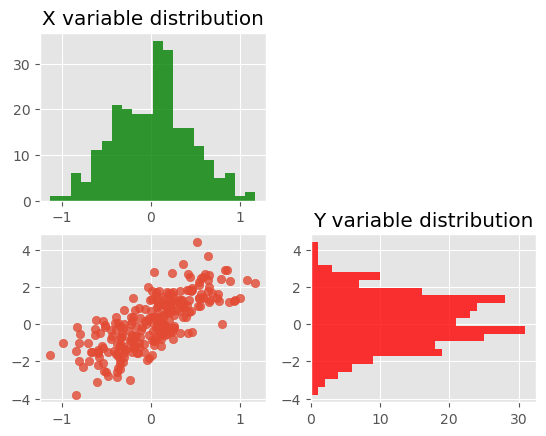

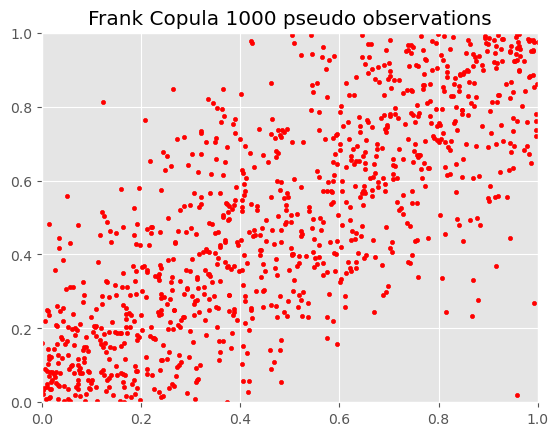

#################################################
Correlation details:
Correlation index range: [-1,1] [negative,positive]
Kendall's tau: 0.5600321285140564
Spearman's rho: 0.7643845821533145
Parameter of the copula (theta): 6.94964599609375
#################################################


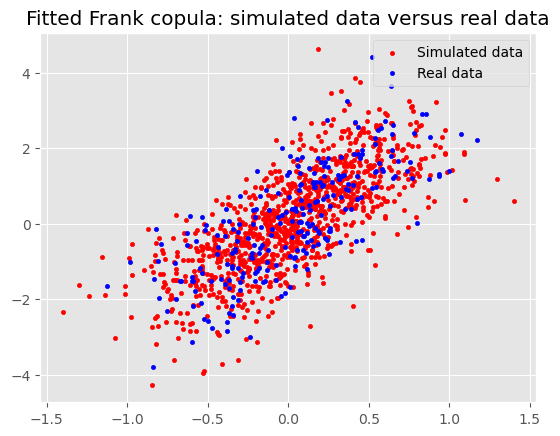

In [5]:
# Copula class
!pip install copulalib
import numpy as np
import matplotlib.pyplot as plt
from copulalib.copulalib import Copula
from scipy.stats import norm
plt.style.use('ggplot')

class copulaClass(object):

    # Available copulas
    families = ['frank','clayton','gumbel']

    def __init__(self,x,y):
        # Information about the data
        self.x = x
        self.y = y
        self.mu_x = np.array(x).mean()
        self.mu_y = np.array(y).mean()
        self.std_x = np.array(x).std()
        self.std_y = np.array(y).std()

        # Information about the copula
        self.cop = 0
        self.famil = 0
        self.tau_ = 0
        self.sr_ = 0
        self.theta_ = 0

    def showAvailableCopulas(self):
        """This function plots available copulas
           to give you a visual insight      """

        # Random simulated data
        x = np.random.normal(size=250)
        y = 2.5*x + np.random.normal(size=250)
        fig = plt.figure()

        # Frank
        frank = Copula(x,y,family='frank')
        uf,vf = frank.generate_uv(1000)
        fig.add_subplot(2,2,1)
        plt.scatter(uf,vf,marker='.',color='blue')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title('Frank copula')

        # Clayton
        clayton = Copula(x,y,family='clayton')
        uc,vc = clayton.generate_uv(1000)
        fig.add_subplot(2,2,2)
        plt.scatter(uc,vc,marker='.',color='red')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title('Clayton copula')

        # Gumbel
        gumbel = Copula(x,y,family='gumbel')
        ug,vg = gumbel.generate_uv(1000)
        fig.add_subplot(2,2,3)
        plt.scatter(ug,vg,marker='.',color='green')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.title('Gumbel copula')

        plt.show()
        

    def plotData(self):
        """This function plots the data you've fed in
           to give you a visual insight of the correlation
           structure and the marginal distributions """
        x = self.x
        y = self.y
        fig = plt.figure()
        fig.add_subplot(2,2,1)
        plt.hist(x,bins=20,color='green',alpha=0.8,align='mid')
        plt.title('X variable distribution')
        fig.add_subplot(2,2,3)
        plt.scatter(x,y,marker="o",alpha=0.8)
        fig.add_subplot(2,2,4)
        plt.title('Joint X,Y')
        plt.hist(y,bins=20,orientation='horizontal',color='red',alpha=0.8,align='mid')
        plt.title('Y variable distribution')    
        plt.show()

    def generateCopula(self,fam,plot=False):
        """Generate the copula and optionally plot it"""
        
        if fam.lower() not in self.families:
            raise ValueError('Please select a valid family name')

        # Copula generation
        self.famil = fam.lower()
        c = Copula(self.x,self.y,family=fam.lower())
        self.cop = c

        # Parameters are estimated and set
        self.tau_ = c.tau
        self.sr_ = c.sr
        self.theta_ = c.theta

        if plot:
            u,v = c.generate_uv(1000)
            plt.scatter(u,v,marker='.',color='red')
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.title(fam.lower().capitalize()+' Copula 1000 pseudo observations')
            plt.show()

    def printCorrelation(self):
        # Print details about correlations and parameters
        print("#################################################")
        print("Correlation details:")
        print("Correlation index range: [-1,1] [negative,positive]")
        print("Kendall's tau:",self.tau_)
        print("Spearman's rho:",self.sr_)
        print("Parameter of the copula (theta):",self.theta_)
        print("#################################################")

    def generatePseudoObs(self,n=1000,plot=False):
        """This function generates and returns simulated pseudo observations """
        
        if self.famil == 0:
            raise ValueError('Generate copula first')

        u,v = self.cop.generate_uv(n)

        if plot:
            plt.scatter(u,v,marker='.',color='red')
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.title(self.famil.capitalize()+' Copula 1000 pseudo observations')
            plt.show()
            
        return u,v

    def getSimulatedData(self,dist='normal',n=1000):
        """This function simulates real observations assuming that your data
           is normally distributed. Optionally you can edit this function and
           choose the distribution that fits your data best"""

        if dist.lower() == 'normal':
            u,v = self.generatePseudoObs(n=n)
            x = norm.ppf(u,loc=self.mu_x,scale=self.std_x)
            y = norm.ppf(v,loc=self.mu_y,scale=self.std_y)
            return x,y


#------------------------------Run the program---------------------------------
# Simulate some data
x = np.random.normal(loc=0,scale=0.4,size=250)
y = 2.5*x + np.random.normal(size=250)

# Genereate a copulaClass instance
a = copulaClass(x,y)

# Visualize your data
a.plotData()

# Should you want to check available copulas run the line below
# a.showAvailableCopulas()

# Fit the copula (say a Frank copula)
a.generateCopula('frank',plot=False)

# Plot pseudo observations
a.generatePseudoObs(plot=True)

# Print parameters
a.printCorrelation()

# Simulate data and plot real observations versus simulated obs.
c,d = a.getSimulatedData()
plt.scatter(c,d,color="red",label="Simulated data",marker='.')
plt.scatter(x,y,color="blue",label="Real data",marker='.')
plt.legend()
plt.title("Fitted Frank copula: simulated data versus real data")
plt.show()

#### References
1. Wikipedia. Copula (probability theory), https://en.wikipedia.org/wiki/Copula_(probability_theory)
2. Generate copula-correlated samples with specified marginals in Python, https://stackoverflow.com/questions/58094554/generate-copula-correlated-samples-with-specified-marginals-in-python
3. kaggle, Copulas in Python. https://www.kaggle.com/code/liamhealy/copulas-in-python